# Day 2 - Assignment

## Problem 1
Calculate the number of lunar months in a year.

In [271]:
import astropy.constants as const
import astropy.units as u
from astropy.time import Time

moon_month_days = 29.530588 * u.day
jullian_year=1*u.yr

print(f"The number of lunar months in a year is : {jullian_year.to(moon_month_days).value:.4f} lunar months")



The number of lunar months in a year is : 12.3685 lunar months


## Problem 2 
Calculate the distance of geostationary satellite from the center of the Earth, in the units of Earth radius, Geostationary satellite has timeperiod equal to Earth's sidereal rotation period.
$$\dfrac{GM}{r^3}=\dfrac{4\pi^2}{T^2}$$

In [2]:
import astropy.constants as const
import astropy.units as u
import numpy as np
G = const.G
M = const.M_earth
T = 86164.0 * u.s
r = ((G*M*(T**2))/(4*np.pi**2))**(1/3)
print(f"distance of geostationary satellite , in the units of Earth radius is : {r.to(u.R_earth):.2f}")


distance of geostationary satellite , in the units of Earth radius is : 6.61 earthRad


## Problem 3 

Moon moves away from the Earth, due to tidal forces, at a rate of about 3.8 cm/year. It is at a distance of 3,84,000 km from Earth. We also know, universe expands at a rate given by Hubble’s law, which is about 72 km/s per Mpc. Calculate at what rate the moon moves away in the units of km/s per Mpc. Compare with the expansion of the Universe.

In [273]:
moon_rate = (3.8/384000) * u.cm/(u.yr*u.km)
universe_rate = 72 * u.km/(u.s*u.Mpc)
print("Rate at which moon moves away in the units of km/s per Mpc = ",moon_rate.to(u.km/(u.s*u.Mpc)),
", Which is more than the expansion of the universe which was = ",universe_rate)




Rate at which moon moves away in the units of km/s per Mpc =  96.76068860382809 km / (Mpc s) , Which is more than the expansion of the universe which was =  72.0 km / (Mpc s)


## Problem 4

Eckart and Genzel measured the speeds of the stars close to the supermassive black holes at the centre of Milky Way. They found speeds about 300 km/s when these stars were at distance of 0.015 pc from the centre. Estimate the mass of the supermassive blackholes in units of M_sun. Speed of object around massive object is given by $$\nu = \sqrt{\dfrac{GM}{r}}$$

In [274]:
G = const.G
r = 0.015 * u.pc
v = 300 * u.km/u.s
M = (r*(v**2))/G
print(f"Mass of the black hole is : {M.to(u.M_sun):.2f}")


Mass of the black hole is : 313886.53 solMass


## Problem 5

Ghez and others identified stars close to the super massive black hole at 0.01pc moving with acceleration of about $3\;mm/s^2$. Estimate the mass of the supermassive blackhole in units of M_sun. Acceleration of object around massive object is given by $$a=\dfrac{GM}{r^2}$$

In [275]:
G = const.G
r = 0.01 * u.pc
a = 3 * u.mm/(u.s**2)
M = (a*(r**2))/G
print(f"Mass of the black hole is : {M.to(u.M_sun):.2f}")


Mass of the black hole is : 2152339.18 solMass


## Problem 6

Sidereal day on Mars is 24h 37m 22.7s and sidereal year on Mars is 686.980 d. 

Mass of the Mars is 0.107 that of the Earth. 
Radius of the Mars is  0.533 that of the Earth. 
Distance of the Mars from the Sun is 1.52368 AU.

- Calculate a solar day on Mars and define it as sol.
- Phobos is at the distance of 9376 km from the Mars. Calculate its period of revolution around Mars in terms of sol.
- Calculate the lunar month (in sol) due to Phobos on Mars.

In [276]:
T_sidereal_day = (24 * 3600 + 37 * 60 + 22.7) * u.s  
T_sidereal_year = (686.980 * 24 * 3600) * u.s  
M_mars = 0.107 * const.M_earth 
r_phobos = 9376 * u.km

# Calculate solar day on Mars
T_sol_mars = 1 / ((1 / T_sidereal_day) - (1 / T_sidereal_year))
print(f"Solar day on Mars (sol): {np.round(T_sol_mars.to(u.hour),2)}")
sol = u.def_unit("sol", T_sol_mars)

# revolution period for Phobos, formula used from problem 2
T_phobos = (2 * np.pi * ((r_phobos**3) / (G * M_mars))**0.5).decompose()
print(f"Period of Revolution of Phobos : {np.round(T_phobos.to(sol),3)}")

# Lunar month on Mars
T_lunar_month = 1 / ((1 / T_phobos) - (1 / T_sol_mars))
print(f"Lunar month due to Phobos on Mars : {np.round(T_lunar_month.to(sol),3)}")


Solar day on Mars (sol): 24.66 h
Period of Revolution of Phobos : 0.311 sol
Lunar month due to Phobos on Mars : 0.452 sol


## Problem 7

At what distance a 100 W lamp will provide the same flux as given by the Sun at the Earth. At what distance the lamp should be to match the flux given by Vega?$$F=\dfrac{L}{4\pi d^2}$$

In [277]:
def Flux(L,d):
    return(L/(4*np.pi*d**2))
L_sun = const.L_sun
d_sun = 1*u.AU
L_lamp = 100*u.W
L_vega = 40*L_sun
d_vega = 25.05*u.lyr

# distance for lamp compared to sun
d_lamp_sun=L_lamp*d_sun/L_sun
print(f"Distance at 100 W lamp will provide the same flux as of Sun is : {d_lamp_sun.to(u.m)}")

# distance for lamp compared to vega
d_lamp_vega=L_lamp*d_vega/L_vega
print(f"Distance at 100 W lamp will provide the same flux as of vega is : {d_lamp_vega.to(u.m)}")


Distance at 100 W lamp will provide the same flux as of Sun is : 3.907990352664577e-14 m
Distance at 100 W lamp will provide the same flux as of vega is : 1.547748813598152e-09 m


## Problem 8

Calculate the distance between Mumbai and Mombasa in R_earth and in km.

In [278]:
import astropy.coordinates as co
C_mumbai = co.EarthLocation.of_address("mumbai").to_geodetic()
C_mombasa = co.EarthLocation.of_address("mombasa").to_geodetic()

SC_mumbai = co.SkyCoord(C_mumbai[0],C_mumbai[1],0)
SC_mombasa = co.SkyCoord(C_mombasa[0],C_mombasa[1],0)

#to calculate distance of sepration we multiplied angular sepration to Radius of earth to get distance on circumference
ang_sep = SC_mumbai.separation(SC_mombasa)
dis_sep = ((ang_sep.to(u.rad)).value*const.R_earth).to(u.km)

print(f"Angular separation: {ang_sep}")
print(f"Distance separation in terms of earth: {dis_sep.to(u.R_earth):.2f}")
print(f"Distance separation: {dis_sep:.2f}")


Angular separation: 40.01648450329709 deg
Distance separation in terms of earth: 0.70 earthRad
Distance separation: 4454.59 km


## Problem 9
Calculate angular separation between stars ‘Fomalhaut’, ‘Canopus’ and ‘Achernar’.

In [279]:
fomalhaut = co.SkyCoord.from_name('Fomalhaut')
canopus = co.SkyCoord.from_name('Canopus')
achernar = co.SkyCoord.from_name('Achernar')

print(f"Angular sepration between Fomalhaut and Canopus is : {fomalhaut.separation(canopus)}")
print(f"Angular sepration between Canopus and Achernar is : {canopus.separation(achernar)}")
print(f"Angular sepration between Fomalhaut and Achernar is : {fomalhaut.separation(achernar)}")


Angular sepration between Fomalhaut and Canopus is : 78.49624630286158 deg
Angular sepration between Canopus and Achernar is : 39.409228685523374 deg
Angular sepration between Fomalhaut and Achernar is : 39.10961151785744 deg


## Problem 10
Calculate the four sides of the Square of Pegasus. At its vertex are the stars: ‘Alpheratz’, ‘Scheat’, ‘Markab’ and ‘Algenib’.

In [280]:
alpheratz =co.SkyCoord.from_name('Alpheratz')
scheat = co.SkyCoord.from_name('Scheat')
markab = co.SkyCoord.from_name('Markab')
algenib = co.SkyCoord.from_name('Algenib')

print(f"Angular measurement of Side 1 between alpheratz and scheat is : {alpheratz.separation(scheat)}")
print(f"Angular measurement of Side 2 between scheat and markab is : {scheat.separation(markab)}")
print(f"Angular measurement of Side 3 between markab and algenib is : {markab.separation(algenib)}")
print(f"Angular measurement of Side 4 between algenib and alpheratz is : {algenib.separation(alpheratz)}")


Angular measurement of Side 1 between alpheratz and scheat is : 14.20877670455847 deg
Angular measurement of Side 2 between scheat and markab is : 12.879547905669218 deg
Angular measurement of Side 3 between markab and algenib is : 16.516065696634822 deg
Angular measurement of Side 4 between algenib and alpheratz is : 13.951744538002126 deg


## Problem 11 - Miller's Planet

In the movie Interstellar, Miller's planet experiences time dilation due to its proximity to a black hole, such that 1 hour on Miller's planet equals 7 years on Earth.

Edwin Hubble first presented his findings about discovering new galaxies during a meeting at Americal Astronomical Society on 1st Jan 1925. 

Use astropy.time module to evaluate how many days/years it has been since this meeting. Assume today's date is 25th December 2024.

Use the def_unit function of astropy to create a new unit definition, say, miller_hour which is equivalent to 7 earth years. 

Test your unit definition by using miller_hour.to(u.year) which should give the output 7.

Find out how many hours it has been on Miller's planet since Hubble's meeting.


In [281]:
from astropy.time import Time

initial_date = "1925-01-01"
todays_date = "2024-12-25"
T1 = Time(initial_date)
T2 = Time(todays_date)

#days difference
days_diff = T2-T1

print(f"Days since {initial_date}: {days_diff.value:.2f} days")
print(f"Years since {initial_date}: {days_diff.to(u.yr).value:.2f} years")

#defining unit
miller_time = 7*u.yr
miller_hour = u.def_unit("miller_hour", miller_time)

#testing unit
print(miller_hour.to(u.year))

#time since hubble's meeting on miller's planet
print(f"Hours it has been on Miller's planet since Hubble's meeting: {days_diff.to(miller_hour):.2f}")



Days since 1925-01-01: 36518.00 days
Years since 1925-01-01: 99.98 years
7.0
Hours it has been on Miller's planet since Hubble's meeting: 14.28 miller_hour


## Problem 12 - Curve Fitting

You are provided with a noisy dataset that represents some physical phenomenon. The data contains underlying exponential, logarithmic and polynomical components. Your task is to apply curve fitting techniques to this data using exponential, logarithmic and polynomical functions, and determine the best fitting model.

The simulated dataset contains two columns `x`(independent variable) and `y`(dependent variable). Your objective is to fit the data to three different models and evaluate the goodness of the fit.

1. Load the data from provided csv file `astronomy_fit_data.csv`
2. Create three functions for Exponential model, logarithmic model and polynomial model (degree 4)

You can use these equations for your model


\begin{align*}
\textbf{Exponential:} \quad & y(x) = G \cdot e^{H \cdot x} \\
\\
\textbf{Logarithmic:} \quad & y(x) = D \cdot \log(E \cdot x + F) \\
\\
\textbf{Polynomial:} \quad & y(x) = I \cdot x^4 + J \cdot x^3 + K \cdot x^2 + L \cdot x
\end{align*}



For the initial conditions you can use these values

\begin{align}
\textbf{Exponential:} \quad & G = 10, \quad H = -0.1 \\
\textbf{Logarithmic:} \quad & D = 8, \quad E = 2, \quad F = 2 \\
\textbf{Polynomial:} \quad & I = 0.5, \quad J = -2, \quad K = 6, \quad L = -15
\end{align}


Visualise the data first.

Then visualise all three fits in the same plot.

Use $R^2$ value for eachmodel to evaluate the goodness and determine which function is the best fit using this value.

Try using different initial condition values to determine if the goodness of the fit increases or decreases.

It is possible that you will face the below error when trying to fit the curve.

```RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.```

Debugging is part of learning, so try to find solution to how you can mitigate this error.


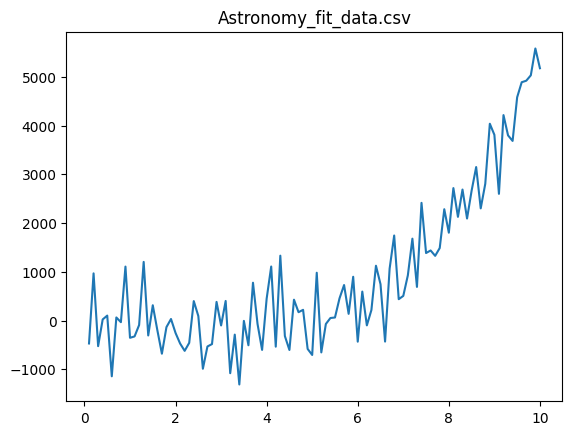

C:\Users\thesi\AppData\Local\Temp\ipykernel_5308\2327091700.py:11: RuntimeWarning: invalid value encountered in log
  return D*np.log(E*x+F)


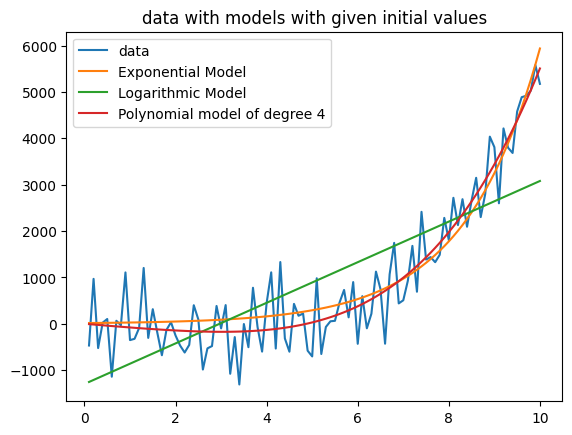

R2 value for Exponential model fit is : 0.8697
R2 value for Logarithmic model fit is : 0.6120
R2 value for Polynomial of degree 4 model fit is : 0.8853
Polynomial of degree 4 model fit is the best fit based on value of R2


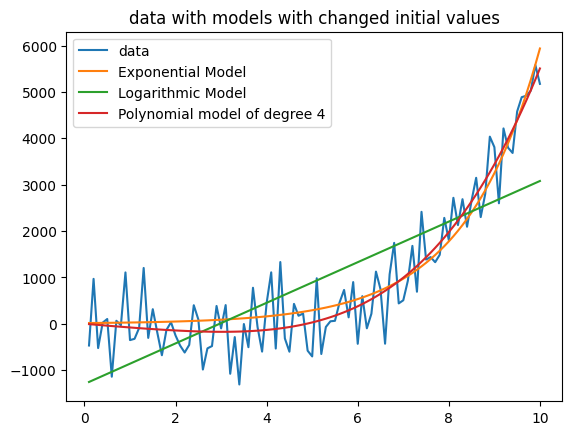

change in R2 value for Exponential model fit : 2.0350721108286507e-11
change in R2 value for Logarithmic model fit : 3.236749780755055e-06
change in R2 value for Polynomial of degree 4 model fit  : -1.176836406102666e-14

Goodness of the fit almost remain same, for both the initial conditions, based of R2 value 


In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import sklearn

#defining functions
def Exp(x,G,H):
    return G*(np.e**(H*x))
def Log(x,D,E,F):
    return D*np.log(E*x+F)
def Poly(x,I,J,K,L):
    return I*x**4+J*x**3+K*x**2+L*x

astro_data=pd.read_csv("astronomy_fit_data.csv")
X=np.array(astro_data["x"])
Y=np.array(astro_data["y"])

#visualisation of data
plt.plot(X,Y)
plt.title("Astronomy_fit_data.csv")
plt.show()

#fitting and ploting with given initial values
G, H = 10, -0.1
D, E, F = 8, 2, 2
I, J, K, L = 0.5, -2, 6, -15
params_exp,covarience_exp=curve_fit(Exp, X, Y, p0=[G,  H])
params_log,covarience_log=curve_fit(Log, X, Y, p0=[D, E, F], maxfev=3000)
params_poly,covarience_poly=curve_fit(Poly, X, Y, p0=[I, J, K, L])
G, H = params_exp
D, E, F = params_log
I, J, K, L = params_poly
plt.plot(X,Y,label = "data")
plt.title("data with models with given initial values")
plt.plot(X, Exp(X,G,H), label = "Exponential Model")
plt.plot(X, Log(X,D,E,F), label = "Logarithmic Model")
plt.plot(X, Poly(X,I,J,K,L), label = "Polynomial model of degree 4")
plt.legend()
plt.show()

#R2 determination for given initial values
exp_R2=sklearn.metrics.r2_score(Y,Exp(X,G,H))
log_R2=sklearn.metrics.r2_score(Y,Log(X,D,E,F))
poly_R2=sklearn.metrics.r2_score(Y,Poly(X,I,J,K,L))
print(f"R2 value for Exponential model fit is : {exp_R2:.4f}")
print(f"R2 value for Logarithmic model fit is : {log_R2:.4f}")
print(f"R2 value for Polynomial of degree 4 model fit is : {poly_R2:.4f}")
print("Polynomial of degree 4 model fit is the best fit based on value of R2")

#fitting and ploting with different initial values
G, H = 14, 0.6
D, E, F = 100000, 0, 1
I, J, K, L = 0.65, -0.67, 5.46, -86
params_exp,covarience_exp=curve_fit(Exp, X, Y, p0=[G,  H])
params_log,covarience_log=curve_fit(Log, X, Y, p0=[D, E, F], maxfev=3000)
params_poly,covarience_poly=curve_fit(Poly, X, Y, p0=[I, J, K, L])
G, H = params_exp
D, E, F = params_log
I, J, K, L = params_poly
plt.plot(X,Y,label = "data")
plt.title("data with models with changed initial values")
plt.plot(X, Exp(X,G,H), label = "Exponential Model")
plt.plot(X, Log(X,D,E,F), label = "Logarithmic Model")
plt.plot(X, Poly(X,I,J,K,L), label = "Polynomial model of degree 4")
plt.legend()
plt.show()

#R2 determination
exp_R2_new=sklearn.metrics.r2_score(Y,Exp(X,G,H))
log_R2_new=sklearn.metrics.r2_score(Y,Log(X,D,E,F))
poly_R2_new=sklearn.metrics.r2_score(Y,Poly(X,I,J,K,L))

print(f"change in R2 value for Exponential model fit : {exp_R2_new-exp_R2}")
print(f"change in R2 value for Logarithmic model fit : {log_R2_new-log_R2}")
print(f"change in R2 value for Polynomial of degree 4 model fit  : {poly_R2_new-poly_R2}")
print("\nGoodness of the fit almost remain same, for both the initial conditions, based of R2 value ")


## Problem 13 - Galactic Time Zones

The Milky Way rotates around its center such that the Sun takes approximately 225 million years to complete one orbit, known as the "Galactic Year."  

- Using the `astropy.units` module, define a new time unit called `galactic_year`.  
- Calculate how many Galactic Years have passed since the Solar System's formation (~4.6 billion years ago).  
- Bonus: If one Galactic Year is divided into 12 Galactic Months, how many Galactic Months has the Solar System existed?

In [264]:
#defining galactic year
galactic_year = u.def_unit("galactic_year", 225e+6 * u.yr)

#Galactic Years since the Solar System's formation
solar_age = 4.6e+9 * u.yr
print(f"Galactic Years since the Solar System's formation : {solar_age.to(galactic_year):.2f}")

#defining galactic month and finding Galactic months since the Solar System's formation
galactic_month = u.def_unit("galactic_month", galactic_year/12)
print(f"Galactic months since the Solar System's formation : {solar_age.to(galactic_month):.2f}")

Galactic Years since the Solar System's formation : 20.44 galactic_year
Galactic months since the Solar System's formation : 245.33 galactic_month


## Problem 14 - Supernova Timing
Type Ia supernovae are standard candles used to measure cosmic distances. Their luminosity fades over time according to the formula $$ L(t) = L_0 e^{-kt} $$

where $ L_0 $ is the initial luminosity and $ k $ is the decay constant. Assume $ L_0 = 10^9 $ $L_\odot$ and $ k = 0.693 $ and $t$ is time in days.

To solve for the time \( t \) when the luminosity drops to $ L(t) = L_{\text{target}} = $ $ 10^6 $ $L_\odot$, we rearrange the equation:

$$
L(t) = L_0 e^{-kt} \quad \Rightarrow \quad t = \frac{\ln(L_0 / L(t))}{k}
$$

- Using `numpy` and `matplotlib`, plot the luminosity decay over 50 days.  
- Calculate how long it will take for the luminosity to drop to $ 10^6 $ $L_\odot$

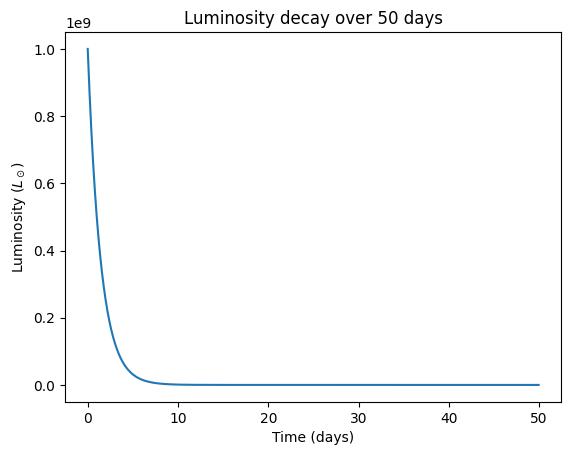

time for the luminosity to drop to 10**6 : 9.97 days


In [265]:
def Lum(t,L_0,k):
    return L_0*(np.e**(-k*t))

L_0 = 10**9
k = 0.693
t = np.arange(0,50,0.05)
L_t = Lum(t,L_0,k)

#Luminosity decay over 50 days
plt.plot(t,L_t)
plt.title("Luminosity decay over 50 days")
plt.xlabel("Time (days)")
plt.ylabel(r"Luminosity ($L_\odot$)")
plt.show()

#time for the luminosity to drop to 10**6 
L_1 = 10**6
t_1 = np.log(L_0/L_1)/k
print(f"time for the luminosity to drop to 10**6 : {t_1:.2f} days")




## Problem 15 - Calculating the Area Spanned by Three Stars


Consider three stars in the sky, each with known Right Ascension (RA) and Declination (Dec) coordinates in the International Celestial Reference System (ICRS). You are tasked with calculating the area spanned by these three stars, forming a [spherical triangle](https://en.wikipedia.org/wiki/Spherical_trigonometry#Notation).



Given the coordinates of the stars in RA and Dec, your goal is to calculate the angular separation between each pair of stars, then use the law of cosines to find the angles of the spherical triangle formed by the stars. Finally, apply the spherical excess formula to determine the area of the spherical triangle on the unit sphere.

### Coordinates of the Stars:

1. **Pleiades**: RA = 03h 48m 30.4s, Dec = +24°11'44.8"
2. **Aldebaran**: RA = 04h 37m 22.7s, Dec = +16°33'36.4"
3. **Capella**: RA = 05h 18m 34.2s, Dec = +46°01'26.1"

### Steps to Solve:

1. **Convert the RA and Dec** of the stars into SkyCoord objects in the ICRS frame using Astropy.
2. **Calculate the angular separation** between each pair of stars.
3. **Convert the angular separations** from degrees to radians.
4. **[Apply the law of cosines](https://en.wikipedia.org/wiki/Spherical_trigonometry#Supplemental_cosine_rules)** to calculate the angles at each vertex of the spherical triangle formed by the stars:
   - Formula for the angles:
     - For angle 1 (opposite side `sep12` =`pleiades.separation(aldebaran)`):
       $$ \cos(	\theta_1) = \dfrac{\cos(	\text{sep23}) - \cos(	\text{sep12}) \cdot \cos(	\text{sep31})}{\sin(	\text{sep12}) \cdot \sin(	\text{sep31})} $$
     - For angle 2 (opposite side `sep23` = `aldebaran.separation(capella)`):
       $$ \cos(	\theta_2) = \dfrac{\cos(	\text{sep31}) - \cos(	\text{sep12}) \cdot \cos(	\text{sep23})}{\sin(	\text{sep12}) \cdot \sin(	\text{sep23})} $$
     - For angle 3 (opposite side `sep31` = `capella.separation(pleiades)`):
       $$ \cos(	\theta_3) = \dfrac{\cos(	\text{sep12}) - \cos(	\text{sep31}) \cdot \cos(	\text{sep23})}{\sin(	\text{sep31}) \cdot \sin(	\text{sep23})} $$

5. **Calculate the angles** using the arccosine function. Once you find $\cos(\theta)$ you can use this code line to find theta values `theta1 = np.arccos(np.clip(cos_angle1, -1.0, 1.0))` Here the np.clip function is used to prevent errors due to numerical inaccuracies when computing the inverse cosine. 
6. **Apply the spherical excess formula** to find the area of the spherical triangle:
   $$ 	\text{Area} = 	\theta_1 + 	\theta_2 + 	\theta_3 - \pi $$

   The area is the spherical excess in **steradians**.



In [266]:
from astropy.coordinates import SkyCoord
# Pleiades:
RA1 = "03h 48m 30.4s"
Dec1 = "+24°11'44.8"
#Aldebaran: 
RA2 = '04h 37m 22.7s'
Dec2 = '+16d 33m 36.4s'
#Capella: 
RA3 = '05h 18m 34.2s'
Dec3 = '+46d 01m 26.1s'

#defining SkyCoord objects
pleiades_corr = SkyCoord(ra=RA1, dec=Dec1, unit=(u.hourangle, u.deg), frame='icrs')
aldebaran_corr = SkyCoord(ra=RA2, dec=Dec2, unit=(u.hourangle, u.deg), frame='icrs')
capella_corr = SkyCoord(ra=RA3, dec=Dec3, unit=(u.hourangle, u.deg), frame='icrs')


#finding angular seprations
sep12=pleiades_corr.separation(aldebaran_corr).to(u.deg)
sep23=aldebaran_corr.separation(capella_corr).to(u.deg)
sep31=capella_corr.separation(pleiades_corr).to(u.deg)
print(f"Angular separation between Pleiades and Aldebaran: {sep12:.4f}")
print(f"Angular separation between Pleiades and Capella: {sep23:.4f}")
print(f"Angular separation between Aldebaran and Capella: {sep31:.4f}")

#angular separations from degrees to radians
sep12_rad=sep12.to(u.rad)
sep23_rad=sep23.to(u.rad)
sep31_rad=sep31.to(u.rad)
print(f"\nAngular separation between Pleiades and Aldebaran in radians: {sep12_rad:.4f}")
print(f"Angular separation between Pleiades and Capella in radians: {sep23_rad:.4f} ")
print(f"Angular separation between Aldebaran and Capella in radians: {sep31_rad:.4f} ")

#calculating cos_theta
cos_theta1 = (np.cos(sep23_rad) - np.cos(sep12_rad) * np.cos(sep31_rad)) / (np.sin(sep12_rad) * np.sin(sep31_rad))
cos_theta2 = (np.cos(sep31_rad) - np.cos(sep12_rad) * np.cos(sep23_rad)) / (np.sin(sep12_rad) * np.sin(sep23_rad))
cos_theta3 = (np.cos(sep12_rad) - np.cos(sep31_rad) * np.cos(sep23_rad)) / (np.sin(sep31_rad) * np.sin(sep23_rad))

#calculating theta
theta1 = np.arccos(np.clip(cos_theta1, -1.0, 1.0))
theta2 = np.arccos(np.clip(cos_theta2, -1.0, 1.0))
theta3 = np.arccos(np.clip(cos_theta3, -1.0, 1.0))
print(f"\nAngle at Pleiades (theta1): {theta1:.4f} ")
print(f"Angle at Aldebaran (theta2): {theta2:.4f} ")
print(f"Angle at Capella (theta3): {theta3:.4f} ")

Area = theta1.value + theta2.value + theta3.value - np.pi
print(f"\nSpherical excess : {Area:.6f} steradians")

Angular separation between Pleiades and Aldebaran: 13.7530 deg
Angular separation between Pleiades and Capella: 30.6895 deg
Angular separation between Aldebaran and Capella: 28.3547 deg

Angular separation between Pleiades and Aldebaran in radians: 0.2400 rad
Angular separation between Pleiades and Capella in radians: 0.5356 rad 
Angular separation between Aldebaran and Capella in radians: 0.4949 rad 

Angle at Pleiades (theta1): 1.5252 rad 
Angle at Aldebaran (theta2): 1.1932 rad 
Angle at Capella (theta3): 0.4840 rad 

Spherical excess : 0.060763 steradians
